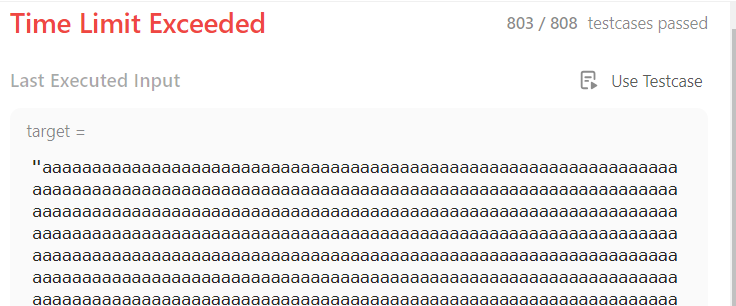

In [1]:
import math
from typing import List

class Solution:
    def minimumCost(self, target: str, words: List[str], costs: List[int]) -> int:
        trie = Trie()
        
        for word, cost in zip(words, costs):
            trie.insert(word, cost)

        dp = [10**10]* (len(target) + 1)
        dp[0] = 0  # cost to build 0 length target

        for i in range(len(target)):
            if dp[i] == 10**10:
                continue
            node = trie.root
            for j in range(i, len(target)):
                if target[j] not in node.children:
                    break
                node = node.children[target[j]]

                if node.eow:
                    dp[j + 1] = min(dp[j+1], dp[i]  + node.cost) # dp[i]- cost of previous substr found yet, and adding the current cost -> so this becomes the total cost of to reach current point in target

        return dp[len(target)] if dp[len(target)] != 10**10 else -1
                

class TrieNode:
    def __init__(self):
        self.children = {}
        self.eow = False
        self.cost = 10**10

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word, cost):
        cur = self.root
        for char in word:
            if char not in cur.children:
                cur.children[char] = TrieNode()
            cur = cur.children[char]
        cur.eow = True
        cur.cost = min(cur.cost, cost)

## SLIGHTLY DIFFERENT APPROACH

In [3]:
import math
from typing import List

class Solution:
    def minimumCost(self, target: str, words: List[str], costs: List[int]) -> int:
        trie = Trie()
        
        for word, cost in zip(words, costs):
            trie.insert(word, cost)

        dp = [10**10]* (len(target) + 1)
        dp[0] = 0  # cost to build 0 length target

        for i in range(len(target)):
            if dp[i] >= 10**10:
                continue
            matches = trie.search(target, i)
            for idx, cost in matches:
                dp[idx] = min(dp[idx], dp[i] + cost)

        return dp[len(target)] if dp[len(target)] < 10**10 else -1
                

class TrieNode:
    def __init__(self):
        self.children = {}
        self.eow = False
        self.cost = 10**10

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word, cost):
        cur = self.root
        for char in word:
            if char not in cur.children:
                cur.children[char] = TrieNode()
            cur = cur.children[char]
        # cur.eow = True
        cur.cost = min(cur.cost, cost)


    def search(self, s, start ):
        cur = self.root
        matches = []
        for i in range(start, len(s)):
            if s[i]  in cur.children:
                cur = cur.children[s[i]]
                if cur.cost < 10**10:
                    matches.append((i + 1, cur.cost))
            else:
                break
        return matches